# MATH 210 Introduction to Mathematical Computing

## March 4, 2016

Today's Agenda:

1. Euler's Method and Slope Fields
2. Systems of ODEs
3. Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as spi

## 1. Euler's Method and Slope Fields

Let's combine our functions from the last two classes to write a new function called `slope_field_euler` which plots the slope field of a first order ODE as well as a solution using Euler's method. The purpose of this exercise is to see how Euler's method steps forward in the direction of the slopes in the slope field.

In [3]:
def slope_field_euler(f,tinterval,yinterval,step,y0,h):
    '''
    Plot the slope field of y'=f(y,t) as well as a solution computed by Euler's method.
    
    INPUTS:
    f - function, the right side of the ODE y' = f(y,t)
    tinterval - list of length 2, the t interval for the slope field
    yinterval - list of length 2, the y interval for the slope field
    step - positive number, the distance between grid points in the slope field
    y0 - number, initial condition for Euler's method
    h - positive number, the time step used in Euler's method
    '''
    # Plot the slope field
    t = np.arange(tinterval[0],tinterval[1]+step,step)
    y = np.arange(yinterval[0],yinterval[1]+step,step)
    L = 0.6*step
    for tvalue in t:
        for yvalue in y:
            m = f(yvalue,tvalue)
            dt = L / np.sqrt(1+m**2)
            dy = m*dt
            t1 = tvalue + dt
            y1 = yvalue + dy
            plt.plot([tvalue,t1],[yvalue,y1],'b')
    plt.xlim([tinterval[0],tinterval[1]])
    plt.ylim([yinterval[0],yinterval[1]])
    
    # Plot the result of Euler's method
    t = np.arange(tinterval[0],tinterval[1]+h,h)
    n = len(t)
    y = np.zeros(n)
    y[0] = y0
    for k in range(0,n-1):
        y[k+1] = y[k] + f(y[k],t[k]) * (t[k+1] - t[k])
    
    plt.plot(t,y)
    
    plt.show()

**Example.** Let's use our function to plot the slope field of $y' = \sin(y) + \cos(t)$ with the solution for $y(0) = 0$.

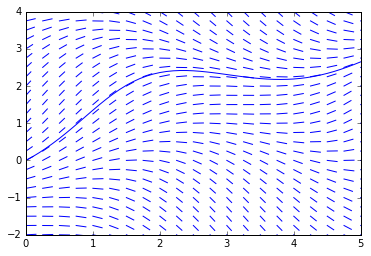

In [10]:
def f(y,t):
    return np.sin(y) + np.cos(t)

slope_field_euler(f,(0,5),(-2,4),0.25,0,0.1)

**Example.** Let's use our function to plot the slope field of $y' = 1/(1+y^2)$ with the solution for $y(0) = -1$.

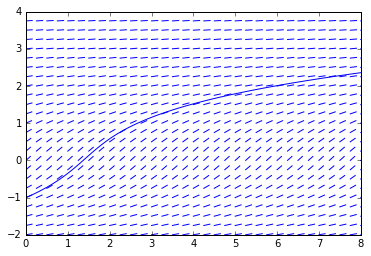

In [14]:
def f(y,t):
    return 1/(1+y**2)

slope_field_euler(f,(0,8),(-2,4),0.25,-1,0.1)

## 2. Systems of ODEs

A system of ODEs is a collection of differential equations involving unknowns functions $y_1(t), \dots, y_n(t)$ and their derivatives. The **order** of the system is the highest order derivative apearing in the system. We can (almost always) write a system as a **first order system** and this allows us to use `odeint`.

Let's start with a second order equation $y'' = f(y,y',t)$. Introduce a new variable for each derivative of $y$ (up to one less than the order): $u_1 = y$ and $u_2 = y'$. And then write the first order system in terms of the new variables:

\begin{align*}
u_1' &= u_2 \\
u_2' &= f(u_1,u_2,t)
\end{align*}

For example, we can write the equation $y'' + y = 0$ as

\begin{align*}
u_1' &= u_2 \\
u_2' &= -u_1
\end{align*}

with $u_1 = y$ and $u_2 = y'$. In this case, the right side of our system of ODEs is a vector function $\mathbf{f}(u_1,u_2,t) = (u_2,-u_1)$ and in vector notation this looks very similar to a first order scalar equation:

$$
\frac{d \mathbf{u}}{dt} = \mathbf{f}(\mathbf{u},t)
$$

where $\mathbf{u} = (u_1,u_2)$.

**Example.** Let's plot an approximaion of the second order ODE $y'' + y = 0$ with $y(0) = 0$ and $y(0) = 1$.

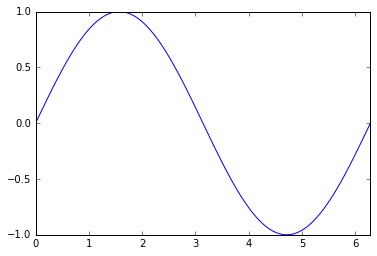

In [17]:
def f(u,t):
    return [u[1],-u[0]]

u0 = [0,1]
t = np.linspace(0,2*np.pi,100)
u = spi.odeint(f,u0,t)
# The output u has two columns: one for u_1 and the other u_2
# To plot the solution, we plot the first column of u which is u_1 = y
plt.plot(t,u[:,0])
plt.xlim([0,2*np.pi])
plt.show()

**Example.** Let's plot the solution of $y'' + 2 y' + 2y = 0$ with $y(0) = 0$ and $y'(0) = 1$. Introduce new variables $u_1 = y$ and $u_2 = y'$ and write

\begin{align*}
u_1' &= u_2 \\
u_2' &= -2u_1 - 2u_2
\end{align*}

therefore the vector function appearing on the right side of the equation is $\mathbf{f}(u_1,u_2,t) = (u_2,-2u_1-2u_2)$.

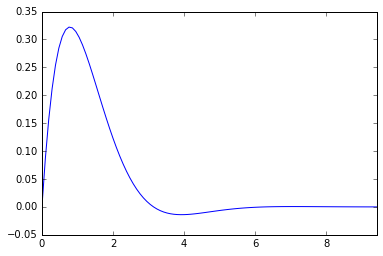

In [22]:
def f(u,t):
    return [u[1],-2*u[0]-2*u[1]]

u0 = [0,1]
t = np.linspace(0,3*np.pi,100)
u = spi.odeint(f,u0,t)
plt.plot(t,u[:,0])
plt.xlim([0,3*np.pi])
plt.show()

**Example.** Let's plot the solution of $y'' + y' + 5y = 0$ with $y(0) = 0$ and $y'(0) = 1$. Introduce new variables $u_1 = y$ and $u_2 = y'$ and write

\begin{align*}
u_1' &= u_2 \\
u_2' &= -5u_1 - u_2
\end{align*}

therefore the vector function appearing on the right side of the equation is $\mathbf{f}(u_1,u_2,t) = (u_2,-5u_1-u_2)$.

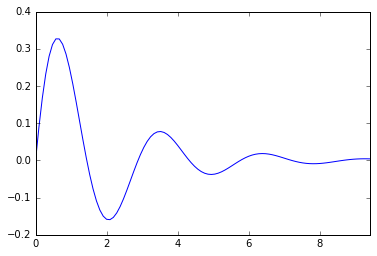

In [26]:
def f(u,t):
    return [u[1],-5*u[0]-u[1]]

u0 = [0,1]
t = np.linspace(0,3*np.pi,100)
u = spi.odeint(f,u0,t)
plt.plot(t,u[:,0])
plt.xlim([0,3*np.pi])
plt.show()

**Example.** Let's plot the solution of the nonlinear equation $y'' + y' - y^2 = 0$ with $y(0) = 0$ and $y'(0) = -1$ over the interval $t \in [0,10]$. Introduce new variables $u_1 = y$ and $u_2 = y'$ and write

\begin{align*}
u_1' &= u_2 \\
u_2' &= u_1^2 - u_2
\end{align*}

therefore the vector function appearing on the right side of the equation is $\mathbf{f}(u_1,u_2,t) = (u_2,u_1^2-u_2)$.

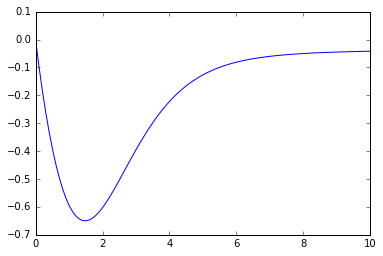

In [45]:
def f(u,t):
    return [u[1],u[0]**2-u[1]]

u0 = [0,-1]
t = np.linspace(0,10,100)
u = spi.odeint(f,u0,t)
plt.plot(t,u[:,0])
plt.show()

## 3. Exercises

**Exercise.** Plot the slope field of $y' = \sin(t^2)$ for $t \in [0,5]$ and $y \in [0,2]$ with grid step $0.1$, and plot an approximation to the equation given the initial condition $y(0) = 0$ with step size $h = 0.1$ (for Euler's method). 

**Exercise.** Use `odeint` to plot the solution of $y'' + 2y' + 7y = \sin(5t)$ for $y(0)=1$ and $y'(0)=3$ over the interval $t \in [0,10]$

**Exercise.** Use `odeint` to plot the solution of $y''' + ty' + 2y = 0$ for $y(0) = 0$, $y'(0) = 2$ and $y''(0) = -5$ over the interval $[0,20]$.